# EDA
die Checkliste ist [hier](https://github.com/JHC90/Basic-DataScience-Skills/blob/master/checklists/2_ExploreData.pdf) zu finden.


## 1) Crate Copy for data Exploration
zunächst versuche ich mit dem gesammelten Datensatz zu arbeiten. Sollte die Performance zu grottig sein, änder ich dies

## 2) Crate Jupyter Notebook um Records zu tracken
Done ;-)

# 3) Study each Attribute
<ul>
    <li>   
    name
    </li>
    <li>   
    Type
    </li>
    <li>   
    missings
    </li>
     <li>   
    Noiseness
    </li>
    <li>   
    Useful
    </li>
</ul>

Am Ende dieses Notebooks habe ich eine Tabelle mit dem Titel "Liste der Feldnamen und meine dazugehörigen Notizen", in welcher ich auf alle Punkte eingehe

## Name
es wurde zunächst einmal eine Datensatzbeschreibung innerhalb der Aufgabenerstellung mitgliefert. Diese kann [hier](../docs/data_car_description.txt) eingesehen werden. Jedoch gibt es keine konkrete "Spaltenbeschrftung" ergo muss diese beim einlesen mitgegeben werden. Bsp für das Vorgehen können [hier](https://github.com/JHC90/Basic-DataScience-Skills/blob/master/2_DataFrame-Interaction.ipynb) eingesehen werden: 

in dieser Rubrik wird auch eine Liste gepflegt mit allen namen+ meine Recherchen dazu

In [1]:
#Create labeled Dataset, Use Cammelcase an no(!!!) "-" as interconnection
labelList=['symboling','normalizedLosses','make','fuel-type','aspiration','numOfDoors','bodyStyle','driveWheels','engineLocation',
           'wheelBase','length','width','height','curbWeight','engineType','numOfCylinders','engineSize','fuelSystem','bore',
           'stroke','compressionRatio','horsepower','peakRpm','cityMpg','highwayMpg','price']
#print(len(labelList))

In [2]:
import pandas as pd
unlabeledDF = pd.read_csv('../data/data_car-CopyForEDA.csv',delimiter=',',encoding='utf-8')
# Einlesen DF gelabelet
LabeledDF = pd.read_csv('../data/data_car-CopyForEDA.csv',delimiter=',',encoding='utf-8', names=labelList)

## Type
hier wird jeder Datentyp angezeigt, dazu kann man Infomrationen aus folgenden Methoden abrufen:

In [4]:
#print(LabeledDF.head())
#LabeledDF.info()
#print(LabeledDF.head())
#LabeledDF.info()
#LabeledDF.describe()

## Missings
Mehrere Optionen was als missings gelten kann
<ul>
    <li>NAN</li>
    <li>Anderes Symbol</li>
</ul>

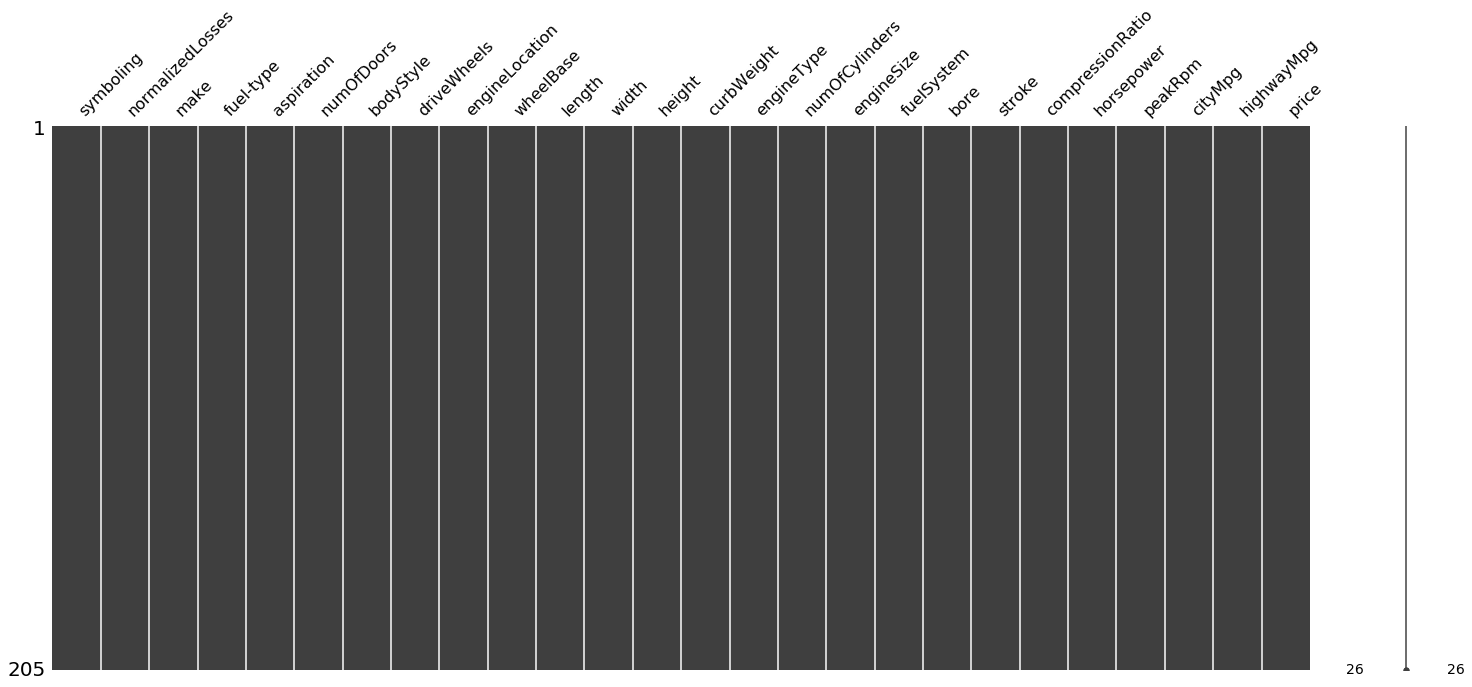

In [5]:
### untersuchung missingnos
#!pip install missingno
import missingno as msno
msno.matrix(LabeledDF)


In [6]:
#LabeledDF.isna().any()
#LabeledDF.isna().sum() 
#LabeledDF.values # > hier der Rückschluss auf "?" als non values

RangeIndex(start=0, stop=205, step=1)

Die obere Grafik & Die Prüfungen nach isna values erweckt den Anschein, dass in dem gesamten Datensatz keine leeren Felder existieren. Das stimmt auch soweit, jedoch sind die fehlende Werte durch ander Symbole dargestellt. Bei der manuellen Sichtung in notepad ++ wirkt es als wäre ein unbekannter wert mit einem "?" markiert
=> ersetzen der "?" druch nans

In [7]:
import numpy as np
LabeledDF = LabeledDF.replace("?", np.nan)

In [8]:
#LabeledDF.isna().any() => schon schaut die Welt "besser" aus, die ? wurden nun durch nas ersetzt

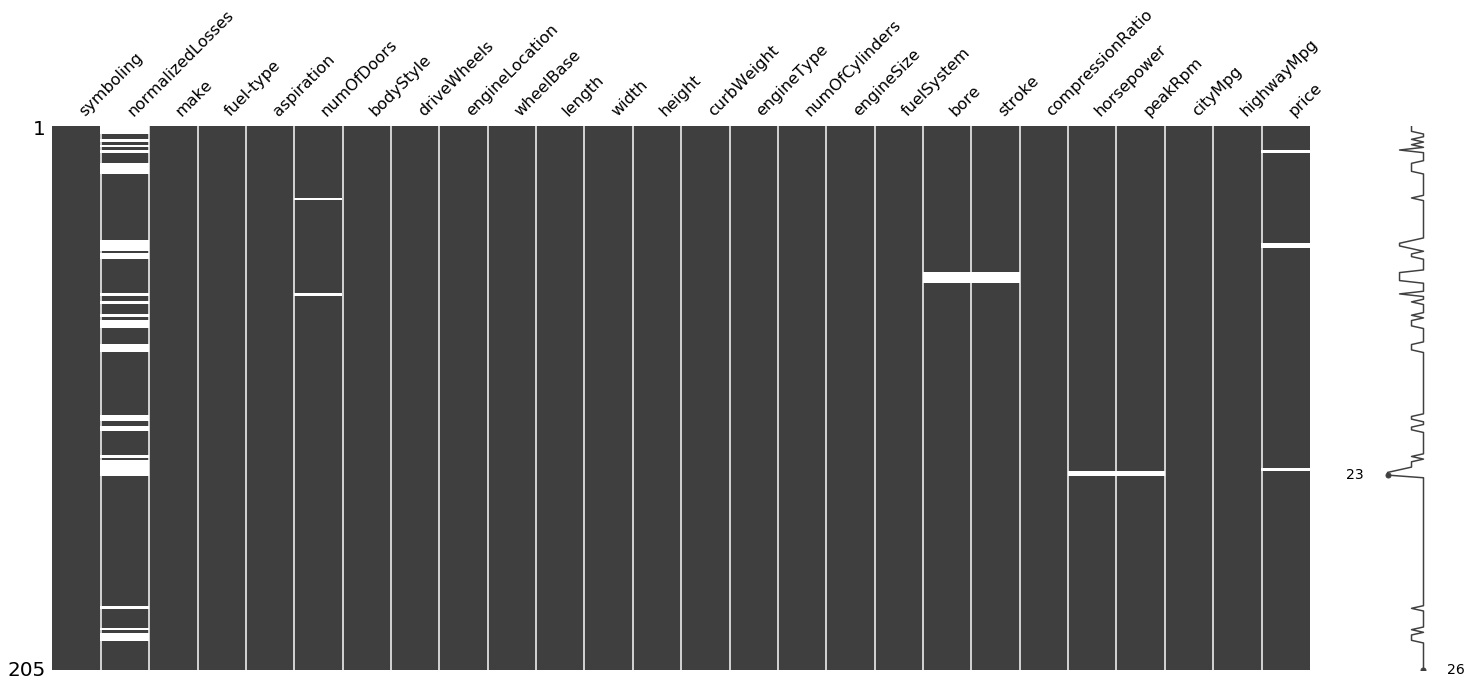

In [9]:
msno.matrix(LabeledDF)

In [10]:
LabeledDF.isna().any()

symboling           False
normalizedLosses     True
make                False
fuel-type           False
aspiration          False
numOfDoors           True
bodyStyle           False
driveWheels         False
engineLocation      False
wheelBase           False
length              False
width               False
height              False
curbWeight          False
engineType          False
numOfCylinders      False
engineSize          False
fuelSystem          False
bore                 True
stroke               True
compressionRatio    False
horsepower           True
peakRpm              True
cityMpg             False
highwayMpg          False
price                True
dtype: bool

nach bisherigem Stand der Dinge sind Missing values in den Feature:<br>
normalized-losses<br>
num-of-doors <br>
bore<br>
stroke<br>
peak-rpm<br>
price<br>
zu erwarten. Wie ich die ersetzte mach ich mir später gedanken. (Price = durchscnitt der marke // peakr rpm in abhängigkeit von HP & Liter // num of door = Majority aus der Marke // normalized loss = check nochmals die Angabe)

## Noisiess and type of Noise

In [11]:
LabeledDF.describe() # => nur die numerischen werte

,symboling,wheelBase,length,width,height,curbWeight,engineSize,compressionRatio,cityMpg,highwayMpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


für mich wirkt es auf der ersten visuellen Prüfung, dass es keine Outlier gibt => visuelle Prüfung mittels Boxplots

In [12]:
# Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

#sns.boxplot(data=LabeledDF.symboling)# keine outlier
#sns.boxplot(data=LabeledDF.wheelBase) # Outlier nach oben zwei Outlier
#sns.boxplot(data=LabeledDF.length) # Outlier nach unten <140 => Kleinwagen?
#sns.boxplot(data=LabeledDF.width) # nach oben mehrere Outlier
#sns.boxplot(data=LabeledDF.height) # keine outlier
#sns.boxplot(data=LabeledDF.curbWeight) # keine outlier
#sns.boxplot(data=LabeledDF.engineSize) # nach oben mehrere Outlier=> hohe Motorisierung
#sns.boxplot(data=LabeledDF.compressionRatio) # nach oben mehrere Outlier=> hohe Motorisierung
#sns.boxplot(data=LabeledDF.cityMpg) # nach oben zwei Outlier => hohe Motorisierung?
#sns.boxplot(data=LabeledDF.highwayMpg) # nach oben mehrere Outlier => hohe Motorisierung?

In [19]:
# Function
'''
Diese Funktion dient dazu, aus den numerischen Feature, welche mitgeliefert wurden die Outlier zu detektieren. Dazu habe ich die Funktion
aus dem Tutorial verwendet und implementiert: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
'''
import matplotlib.pyplot as plt
import statistics

def find_anomalies(inputData):
    anomalies=[]
    input_data_std = statistics.stdev(inputData)
    input_data_mean = statistics.mean(inputData)
    anomaly_cut_off = input_data_std * 3
    lower_limit  = input_data_mean - anomaly_cut_off 
    upper_limit = input_data_mean + anomaly_cut_off
    
    
    print("std: " + str(input_data_std))
    print("mean: " + str(input_data_mean))
    print("cur-Off: " + str(anomaly_cut_off))
    print("lower_limit: " + str(lower_limit))
    print("upper_limit: " + str(upper_limit))
    print("Folgende Ausreißer:")
    for i in range(0, len(inputData),1):
        if inputData[i] > upper_limit or inputData[i] < lower_limit:
            print(i)
            print(LabeledDF.iloc[i,])
   
    
    

In [20]:
subsetLabeledDF=LabeledDF.select_dtypes(include=['float64', 'int64']) # => nur die numerischen Werte
listColumnNamesNumericalSubset = []
for col in subsetLabeledDF.columns: 
    listColumnNamesNumericalSubset.append(col)
print(listColumnNamesNumericalSubset)

['symboling', 'wheelBase', 'length', 'width', 'height', 'curbWeight', 'engineSize', 'compressionRatio', 'cityMpg', 'highwayMpg']


In [21]:
anomalies = [] # liste in welche alle Anomalien gespeichert werden sollen, die können anschließend geprüft werden
#find_anomalies(LabeledDF.wheelBase, anomalies)
for i in range(0,len(listColumnNamesNumericalSubset),1):
    name = (listColumnNamesNumericalSubset[i])
    print(name)
    list =  subsetLabeledDF.iloc[:,i]
    #print(subsetLabeledDF.iloc[:,i])
    anomalies = find_anomalies(list)
    print('######################')
    
    

symboling
std: 1.2453068281055297
mean: 0.8341463414634146
cur-Off: 3.735920484316589
lower_limit: -2.9017741428531747
upper_limit: 4.570066825780004
Folgende Ausreißer:
######################
wheelBase
std: 6.021775685025571
mean: 98.75658536585365
cur-Off: 18.065327055076715
lower_limit: 80.69125831077693
upper_limit: 116.82191242093037
Folgende Ausreißer:
73
symboling                       0
normalizedLosses              NaN
make                mercedes-benz
fuel-type                     gas
aspiration                    std
numOfDoors                   four
bodyStyle                   sedan
driveWheels                   rwd
engineLocation              front
wheelBase                   120.9
length                      208.1
width                        71.7
height                       56.7
curbWeight                   3900
engineType                   ohcv
numOfCylinders              eight
engineSize                    308
fuelSystem                   mpfi
bore                    

Die durch die funktion aufgelisteten Outlier habe ich gegengeprüft und für mich scheinen diese als Realistisch Werte, da wir entweder ein besonders sportliches Auto(bspw Jaguar index 47&48 mit hoher Engine-Size) oder ein besondere hohen Radstand(Mercedes Sedan) als outlier detektiert wurde. 

## Korrelationen
könnnen logischerweise zunächst nur auf die nummerischen Werte angewendet werden. Ich habe hier 

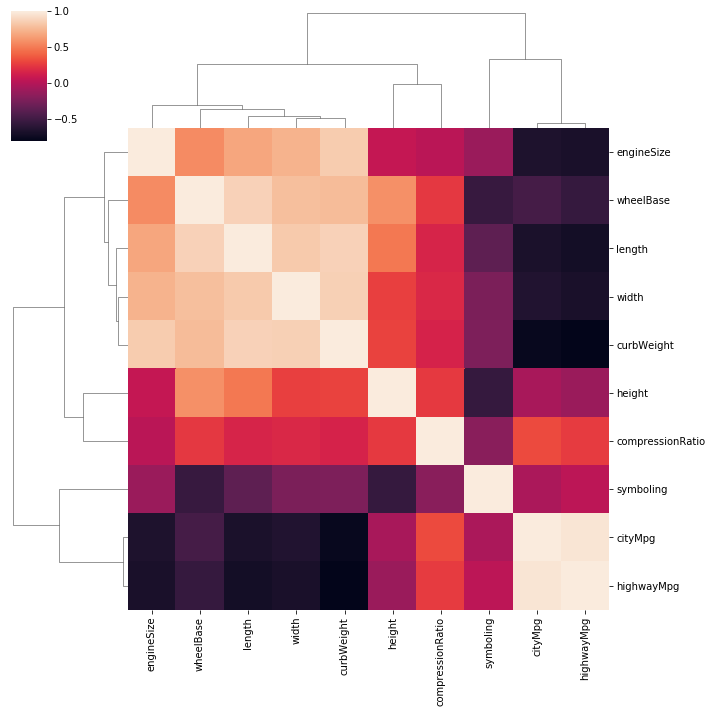

In [24]:
import seaborn as sns
sns.clustermap(LabeledDF.corr())

Iwie einleuchtend dass der Verbrauch mit der Maschinengröße, länge, breite Leergewicht zusammenhängt

In [25]:
subsetLabeledDF=LabeledDF.select_dtypes(include=['float64', 'int'])

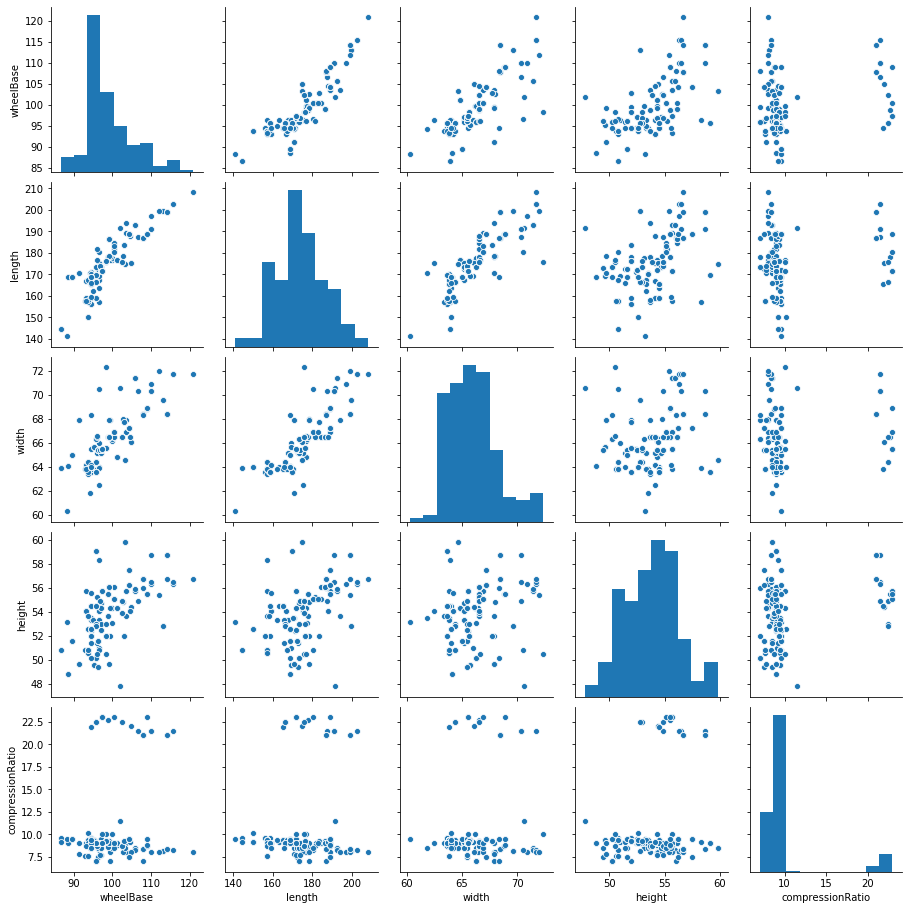

In [26]:
sns.pairplot(subsetLabeledDF.fillna(0)) 

# Supervised or not?

1) Aufgabe 1 = Supervised Regression um Inssurance risk = symboling zu schätzen<br>
2) Aufgabe 2 = Klassifikation Supervised = Number of Cylinders als Output<br>
3) Aufgabe 3 = Aufgabe aus 1 oder 2 mittels NN umsetzen<br>

### Liste der Feldnamen und meine dazugehörigen Notizen

<table>
  <tr>
    <td>Feld-Name</td>
    <td>Beschreibung</td>
      <td>Typ</td>
      <td>Nutzbar für die aufgbae</td>
      <td>Rauschen?</td>
      <td>nas?</td>
      <td>Output</td>
  </tr>
  <tr>
    <td>symboling</td>
    <td>Risiko-Symbol, Abhängig vom Preis & der Risikostufe. Je nach +3 = sehr riskoreich / -3 = wenig risikoreich<br>
      das hier ist der Output für Aufgabe1
      </td>
      <td>int64</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>normalized-losses</td>
    <td>Verlust im VGL zu anderen Fahrzeugen. Durchschnittlicher Verlust pro Jahr und Fahrzeug.<br>!!!! hat NAs  </td>
    <td>int64</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>ja</td>
    </tr>
  <tr>
    <td>Make</td>
    <td>Marke, ggf OHE</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>fuel-type</td>
    <td>Welcher Verbrauch // OHE // entweder gas oder Diesel</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>  
  <tr>
    <td>aspiration = Ladung</td>
    <td>Turbolader oder nicht // OHE // Energie des Abgasstrom gewinnnend zu nutzen = mehr Power</td>
       <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>  
  <tr>
    <td>num-of-doors</td>
    <td>OHE // das sollte ggf noch in int umgewandelt werden, im Orginal sind die Zahlen ausgeschrieben<br>!!!! hat NAs</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>ja</td>
  </tr>  
  <tr>
    <td>body-style</td>
    <td>OHE</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>drive-wheels</td>
    <td>4wd = allrad, fwd = frontwheeldrive =Frontler , rwd = rear wheel drive = Heckler.</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>engine location</td>
    <td>vorne oder hinten</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>wheel base</td>
    <td>Radstand, hängt wsl mit der breite des Fahrzeuges zusammen</td>
      <td>float64</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>length, width, height</td>
    <td>länge, höhe breite</td>
      <td>float64</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
     <tr>
    <td>curb-weigh // leergewicht</td>
    <td>Leergewicht, wsl in Abhängigkeit von dem Fahrzeugtyp, der länge und breite</td>
         <td>int64</td>
          <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
         <td>nein</td>
  </tr>
  <tr>
    <td>engine-type</td>
    <td>Motorart</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>num-of-cylinders</td>
    <td>Zylinderanzahl, kann auch wieder von normaler Formulierung umgewandelt werden</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>engine-size</td>
    <td>Motorgröße, </td>
      <td>int64</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>fuel-system</td>
    <td>???</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
    <tr>
    <td>bore</td>
    <td>bohrung  // bar, Luftdruck??<br>!!!! hat NAs</td>
        <td>object</td>
         <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
        <td>ja</td>
  </tr>
  <tr>
    <td>stroke</td>
    <td>???<br>!!!! hat NAs</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>ja</td>
  </tr>
  <tr>
    <td>compression-ratio</td>
    <td>???</td>
      <td>float64</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>nein</td>
  </tr>
  <tr>
    <td>horsepower</td>
    <td>PS<br>!!!! hat NAs</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>ja</td>
  </tr>
  <tr>
    <td>peak-rpm</td>
    <td>Max-Drehzahl<br>!!!! hat NAs</td>
      <td>object</td>
       <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
      <td>ja</td>
  </tr>
    <tr>
    <td>city-mpg</td>
    <td>Stadt-Verbrauchh, in Abhängigkeit von Durchschnittsverbrauch der Marke</td>
        <td>int64</td>
         <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
        <td>nein</td>
  </tr>
    <tr>
    <td>highway-mpr</td>
    <td>AutobahnVerbrauch, in Abhängigkeit von Durchschnittsverbrauch der Marke</td>
        <td>int64</td>
         <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
        <td>nein</td>
  </tr>
    <tr>
    <td>price</td>
    <td>Preis, imputation aus mittelwert der Marke<br>!!!! hat NAs</td>
        <td>object</td>
         <td>Frage nach Feature-Importance</td>
      <td>nichts ausergewöhnliches, glaube ich</td>
        <td>ja</td>
  </tr>
</table>

In [ ]:
#What 